In [51]:
import pandas as pd
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt  # 그래프 그리는 라이브러리
from sklearn.model_selection import train_test_split
from sklearn import metrics  # 평가를 위한 라이브러리
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns  # 시각화 라이브러리
from sklearn.naive_bayes import GaussianNB # Naive Bayes classification model

In [52]:
# matplotlib 한글 출력 가능하도록 만들기
from matplotlib import font_manager, rc

In [53]:
train = pd.read_csv('/Users/daewonYoon/Desktop/Machine Learning/Project 3/data/data.csv', index_col = 'day_text')

### 결측치 채우기

In [54]:
#결측치 확인
train.isnull().sum()

time_text         0
team_text         0
location          0
H_text            0
HR_text           0
S_text            0
ST_text           0
DU_text           0
ER_text           0
result_text       0
temp              0
rain           7212
wind              2
d_wind            2
humidity          0
atmosphere        0
surface           2
dtype: int64

In [55]:
#결측치 0으로 채우기
train['rain'] = train['rain'].fillna('0')
train['wind'] = train['wind'].fillna('0')
train['d_wind'] = train['d_wind'].fillna('0')
train['surface'] = train['surface'].fillna('0')

In [56]:
train.isnull().sum()

time_text      0
team_text      0
location       0
H_text         0
HR_text        0
S_text         0
ST_text        0
DU_text        0
ER_text        0
result_text    0
temp           0
rain           0
wind           0
d_wind         0
humidity       0
atmosphere     0
surface        0
dtype: int64

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10230 entries, 4.2화 to 9.30일
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time_text    10230 non-null  object 
 1   team_text    10230 non-null  object 
 2   location     10230 non-null  object 
 3   H_text       10230 non-null  int64  
 4   HR_text      10230 non-null  int64  
 5   S_text       10230 non-null  int64  
 6   ST_text      10230 non-null  int64  
 7   DU_text      10230 non-null  int64  
 8   ER_text      10230 non-null  int64  
 9   result_text  10230 non-null  int64  
 10  temp         10230 non-null  float64
 11  rain         10230 non-null  object 
 12  wind         10230 non-null  object 
 13  d_wind       10230 non-null  object 
 14  humidity     10230 non-null  int64  
 15  atmosphere   10230 non-null  float64
 16  surface      10230 non-null  object 
dtypes: float64(2), int64(8), object(7)
memory usage: 1.4+ MB


<AxesSubplot:>

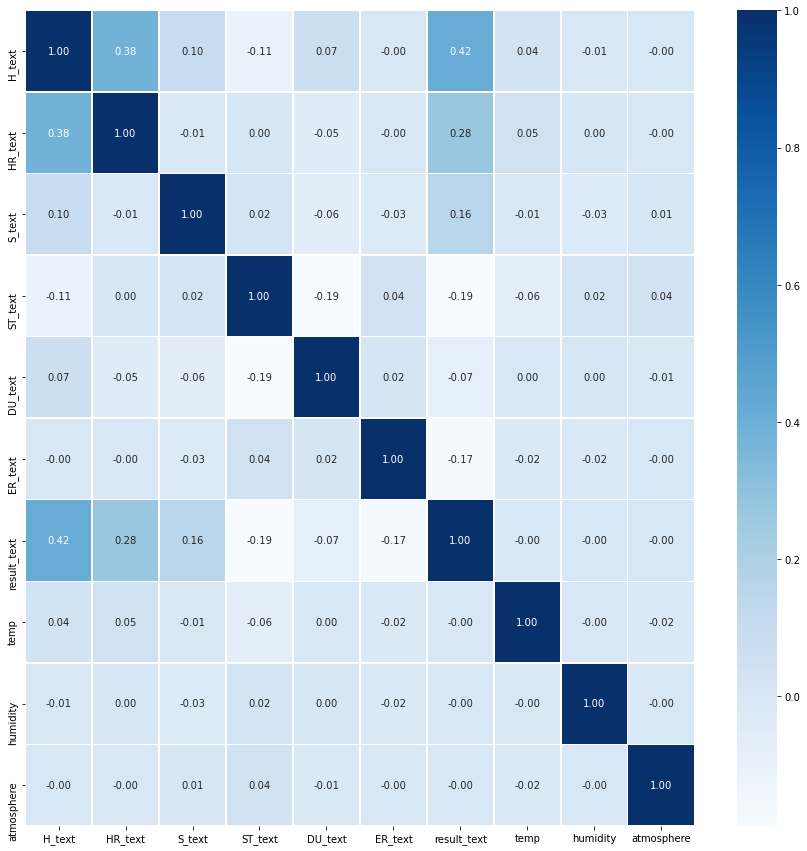

In [58]:
plt.figure(figsize=(15,15))
sns.heatmap(data = train.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [59]:
train['rain'] = train['rain'].astype('float64')
train['wind'] = train['wind'].astype('float64')
train['d_wind'] = train['d_wind'].astype('float64')
train['atmosphere'] = train['atmosphere'].astype('float64')
train['surface'] = train['surface'].astype('float64')

### 원핫인코딩

In [60]:
cat_feature = ['team_text','location']

In [61]:
for i in cat_feature:
    dummy = pd.get_dummies(train[i], prefix = i)
    train = pd.concat([train, dummy], axis = 1)
    train.drop(i, axis=1, inplace = True)

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10230 entries, 4.2화 to 9.30일
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time_text           10230 non-null  object 
 1   H_text              10230 non-null  int64  
 2   HR_text             10230 non-null  int64  
 3   S_text              10230 non-null  int64  
 4   ST_text             10230 non-null  int64  
 5   DU_text             10230 non-null  int64  
 6   ER_text             10230 non-null  int64  
 7   result_text         10230 non-null  int64  
 8   temp                10230 non-null  float64
 9   rain                10230 non-null  float64
 10  wind                10230 non-null  float64
 11  d_wind              10230 non-null  float64
 12  humidity            10230 non-null  int64  
 13  atmosphere          10230 non-null  float64
 14  surface             10230 non-null  float64
 15  team_text_KIA 타이거즈  10230 non-null  uint8  
 16  team_t

### 데이터 7:3으로 나누기

In [63]:
#7대 3으로 데이터 나누기
X = train.drop('ST_text',axis = 1)
y = train['ST_text']

X_train, X_test, y_train,y_test = train_test_split(X,y,
                                                  test_size = 0.3,
                                                  #stratify = y,
                                                  random_state = 3)

In [64]:
print(X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(7161, 32) (7161,) (3069, 32) (3069,)


In [65]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7161 entries, 9.5수 to 8.2일
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time_text           7161 non-null   object 
 1   H_text              7161 non-null   int64  
 2   HR_text             7161 non-null   int64  
 3   S_text              7161 non-null   int64  
 4   DU_text             7161 non-null   int64  
 5   ER_text             7161 non-null   int64  
 6   result_text         7161 non-null   int64  
 7   temp                7161 non-null   float64
 8   rain                7161 non-null   float64
 9   wind                7161 non-null   float64
 10  d_wind              7161 non-null   float64
 11  humidity            7161 non-null   int64  
 12  atmosphere          7161 non-null   float64
 13  surface             7161 non-null   float64
 14  team_text_KIA 타이거즈  7161 non-null   uint8  
 15  team_text_LG 트윈스    7161 non-null   uint8  
 16  team_tex

In [66]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3069 entries, 9.1일 to 5.13일
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time_text           3069 non-null   object 
 1   H_text              3069 non-null   int64  
 2   HR_text             3069 non-null   int64  
 3   S_text              3069 non-null   int64  
 4   DU_text             3069 non-null   int64  
 5   ER_text             3069 non-null   int64  
 6   result_text         3069 non-null   int64  
 7   temp                3069 non-null   float64
 8   rain                3069 non-null   float64
 9   wind                3069 non-null   float64
 10  d_wind              3069 non-null   float64
 11  humidity            3069 non-null   int64  
 12  atmosphere          3069 non-null   float64
 13  surface             3069 non-null   float64
 14  team_text_KIA 타이거즈  3069 non-null   uint8  
 15  team_text_LG 트윈스    3069 non-null   uint8  
 16  team_te

### Time_text Drop

In [67]:
X_train.drop('time_text', axis = 1 , inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [68]:
X_test.drop('time_text', axis = 1, inplace = True)

In [69]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3069 entries, 9.1일 to 5.13일
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   H_text              3069 non-null   int64  
 1   HR_text             3069 non-null   int64  
 2   S_text              3069 non-null   int64  
 3   DU_text             3069 non-null   int64  
 4   ER_text             3069 non-null   int64  
 5   result_text         3069 non-null   int64  
 6   temp                3069 non-null   float64
 7   rain                3069 non-null   float64
 8   wind                3069 non-null   float64
 9   d_wind              3069 non-null   float64
 10  humidity            3069 non-null   int64  
 11  atmosphere          3069 non-null   float64
 12  surface             3069 non-null   float64
 13  team_text_KIA 타이거즈  3069 non-null   uint8  
 14  team_text_LG 트윈스    3069 non-null   uint8  
 15  team_text_NC 다이노스   3069 non-null   uint8  
 16  team_te

In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7161 entries, 9.5수 to 8.2일
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   H_text              7161 non-null   int64  
 1   HR_text             7161 non-null   int64  
 2   S_text              7161 non-null   int64  
 3   DU_text             7161 non-null   int64  
 4   ER_text             7161 non-null   int64  
 5   result_text         7161 non-null   int64  
 6   temp                7161 non-null   float64
 7   rain                7161 non-null   float64
 8   wind                7161 non-null   float64
 9   d_wind              7161 non-null   float64
 10  humidity            7161 non-null   int64  
 11  atmosphere          7161 non-null   float64
 12  surface             7161 non-null   float64
 13  team_text_KIA 타이거즈  7161 non-null   uint8  
 14  team_text_LG 트윈스    7161 non-null   uint8  
 15  team_text_NC 다이노스   7161 non-null   uint8  
 16  team_tex

In [71]:
set(X_train.columns) - set(X_test.columns)

set()

### KNNRegressor

In [72]:
knn_model = KNeighborsRegressor(n_neighbors = 3)
result1 = cross_val_score(knn_model,
                        X_train,
                        y_train,
                        cv = 5)
result1

array([-0.27536088, -0.24428024, -0.23406389, -0.31996376, -0.31066797])

In [73]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [74]:
print("테스트 세트 예측: {}".format(knn_model.predict(X_test)))

테스트 세트 예측: [7.33333333 6.33333333 5.33333333 ... 8.33333333 7.66666667 8.        ]


In [75]:
print("테스트 세트 정확도: {:.2f}".format(knn_model.score(X_test, y_test)))

테스트 세트 정확도: -0.30


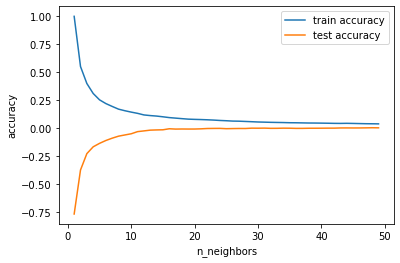

In [26]:

training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 50)

for n_neighbors in neighbors_settings:
    # 모델 생성
    knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(knn_model.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(knn_model.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="train accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# if there would be huge gap between train and test data, then you should reset neighbors_settings = range(1, 50)

In [28]:
train.corr()

,H_text,HR_text,S_text,ST_text,DU_text,ER_text,result_text,temp,rain,wind,d_wind,humidity,atmosphere,surface,team_text_KIA 타이거즈,team_text_LG 트윈스,team_text_NC 다이노스,team_text_SK 와이번스,team_text_kt wiz,team_text_두산 베어스,team_text_롯데 자이언츠,team_text_삼성 라이온즈,team_text_키움 히어로즈,team_text_한화 이글스,location_광주,location_대구,location_대전,location_부산,location_서울,location_수원,location_인천,location_창원
H_text,1.000000,0.383581,0.100431,-0.106757,0.072540,-0.003177,0.415686,0.038023,-0.014079,0.007532,0.014806,-0.005302,-0.001555,0.049588,-0.015049,-0.001790,0.003942,-0.028148,-0.004295,0.050998,-0.005154,0.021887,0.012440,-0.035362,0.005340,0.004050,-0.008851,-0.014177,0.034046,0.007981,-0.026271,-0.019447
HR_text,0.383581,1.000000,-0.013616,0.001625,-0.048454,-0.004353,0.275474,0.046702,-0.008808,0.006405,0.013575,0.003391,-0.004403,0.034918,-0.019736,-0.054123,0.020548,0.066374,0.003279,0.002650,-0.006640,0.014041,0.028764,-0.053731,-0.013005,-0.013005,-0.031871,-0.033396,0.053171,0.019554,-0.005830,-0.000436
S_text,0.100431,-0.013616,1.000000,0.023276,-0.061370,-0.027062,0.160833,-0.006179,-0.011611,0.026610,0.034096,-0.033283,0.007055,-0.001689,-0.005394,0.000659,0.032016,-0.007468,-0.016994,0.004842,-0.021377,0.037338,0.034335,-0.058978,0.018024,0.008335,0.008828,-0.006990,0.000928,-0.006212,0.001853,-0.027517
ST_text,-0.106757,0.001625,0.023276,1.000000,-0.188802,0.044196,-0.186898,-0.063495,-0.017556,-0.009756,0.005120,0.023572,0.040386,-0.086744,-0.036534,-0.006544,0.013775,0.025089,0.031558,-0.125853,0.046515,-0.047297,0.036326,0.068139,-0.002558,-0.016408,0.014252,0.022452,-0.020216,0.012698,0.003162,-0.000993
DU_text,0.072540,-0.048454,-0.061370,-0.188802,1.000000,0.016473,-0.073150,0.001092,-0.010482,0.008629,0.014731,0.003202,-0.009591,0.008746,0.001105,-0.008768,0.000579,-0.035088,0.008569,0.019676,0.023877,-0.015094,-0.009566,0.016123,0.004595,-0.009866,0.009269,0.001347,0.008637,0.005872,-0.016714,-0.006973
ER_text,-0.003177,-0.004353,-0.027062,0.044196,0.016473,1.000000,-0.168704,-0.021299,0.008397,-0.000762,-0.002339,-0.021533,-0.001773,-0.016543,-0.002334,0.004245,-0.005229,0.003004,0.035975,-0.037543,0.019260,-0.020661,0.006546,0.001876,0.023005,-0.009952,-0.000835,-0.003215,-0.004573,0.016273,-0.012263,-0.003654
result_text,0.415686,0.275474,0.160833,-0.186898,-0.073150,-0.168704,1.000000,-0.000326,-0.000091,0.000658,0.000010,-0.001471,-0.000180,-0.000208,-0.010871,0.005490,0.006987,0.010926,-0.038806,0.056618,-0.017916,0.007737,0.022959,-0.048791,0.000046,-0.001237,0.000686,-0.000586,0.000966,-0.000421,0.000707,-0.000773
temp,0.038023,0.046702,-0.006179,-0.063495,0.001092,-0.021299,-0.000326,1.000000,-0.025135,-0.085648,0.023715,-0.003875,-0.018683,0.799694,0.022585,0.013929,-0.025375,-0.038888,-0.016478,0.014886,-0.043696,0.037176,0.003866,0.028106,0.022224,0.072894,0.069892,-0.097168,0.040609,-0.013724,-0.064359,-0.055578
rain,-0.014079,-0.008808,-0.011611,-0.017556,-0.010482,0.008397,-0.000091,-0.025135,1.000000,-0.020733,-0.061242,0.176632,-0.007776,-0.032953,0.006562,-0.010265,0.011712,-0.012249,-0.002467,0.006263,-0.004962,0.020638,-0.007173,-0.007713,0.013011,0.053174,-0.004827,0.008990,-0.029973,-0.012925,-0.021701,0.008570
wind,0.007532,0.006405,0.026610,-0.009756,0.008629,-0.000762,0.000658,-0.085648,-0.020733,1.000000,0.051114,-0.135866,-0.000971,0.007779,-0.050338,0.027553,-0.072734,0.054108,-0.043481,0.035377,0.066655,0.007098,0.033368,-0.068129,-0.118060,0.001759,-0.175438,0.144024,0.156361,-0.048064,0.103922,-0.162957


# Decision Tree model

In [76]:
tree_model = DecisionTreeClassifier(max_depth = 7)

In [77]:
result = cross_val_score(tree_model,
                        X_train,
                        y_train,
                        cv = 10)
result

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([0.15481172, 0.12290503, 0.12988827, 0.15642458, 0.16061453,
       0.1396648 , 0.14944134, 0.16480447, 0.14804469, 0.15502793])

In [78]:
result.mean()

0.1481627357939272

In [79]:
y_pred = tree_model.fit(X_train, y_train).predict(X_test)

In [80]:
print("총 ST 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

총 ST 갯수 3069 에서 틀린 예측 갯수 : 2596


In [81]:
print("예측 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

예측 정확도: 0.15


In [82]:
tree_model.score(X_test,y_test)

0.15412186379928317

In [83]:
tree_model.score(X_train,y_train)

0.20821114369501467

# KNN Scaler 

In [34]:
scaler = StandardScaler()

In [35]:
scaler.fit(X_train)  # 평균과 표준편차로 scaling 한 값을 컴퓨터가 기억

StandardScaler()

In [36]:
transform_X_train = scaler.transform(X_train)
transform_X_train

array([[-2.01738565,  0.08763645, -0.7591698 , ..., -0.28127198,
        -0.34987683, -0.31862649],
       [-0.94931189, -0.87636449,  0.2498159 , ..., -0.28127198,
        -0.34987683, -0.31862649],
       [-0.14825657,  2.01563833,  0.2498159 , ..., -0.28127198,
        -0.34987683, -0.31862649],
       ...,
       [-0.68229345,  0.08763645, -0.7591698 , ..., -0.28127198,
         2.85814872, -0.31862649],
       [-2.01738565, -0.87636449, -0.7591698 , ..., -0.28127198,
        -0.34987683, -0.31862649],
       [-0.41527501,  0.08763645, -0.7591698 , ..., -0.28127198,
        -0.34987683, -0.31862649]])

In [37]:
transform_X_test = scaler.transform(X_test)
transform_X_test

array([[-0.94931189, -0.87636449, -0.7591698 , ..., -0.28127198,
        -0.34987683, -0.31862649],
       [-0.94931189,  0.08763645, -0.7591698 , ...,  3.55527777,
        -0.34987683, -0.31862649],
       [-0.68229345,  0.08763645,  0.2498159 , ..., -0.28127198,
        -0.34987683, -0.31862649],
       ...,
       [ 0.38578031,  0.08763645, -0.7591698 , ..., -0.28127198,
        -0.34987683, -0.31862649],
       [ 0.11876187, -0.87636449, -0.7591698 , ..., -0.28127198,
        -0.34987683, -0.31862649],
       [-0.94931189,  1.05163739,  0.2498159 , ..., -0.28127198,
        -0.34987683, -0.31862649]])

In [38]:
result = cross_val_score(knn_model,
                        transform_X_train,
                        y_train,
                        cv = 10)
result

array([-0.30343476, -0.31948202, -0.27346982, -0.25499201, -0.25470497,
       -0.22100456, -0.31504315, -0.23996321, -0.30901073, -0.27374049])

In [39]:
result = cross_val_score(knn_model,
                        transform_X_train,
                        y_train,
                        cv = 10)
result

array([-0.30343476, -0.31948202, -0.27346982, -0.25499201, -0.25470497,
       -0.22100456, -0.31504315, -0.23996321, -0.30901073, -0.27374049])

In [40]:
y_pred = knn_model.fit(transform_X_train, y_train).predict(transform_X_test)

In [84]:
print("총 ST 갯수 %d 에서 틀린 예측 갯수 : %d" % (transform_X_test.shape[0], (y_test != y_pred).sum()))

총 ST 갯수 3069 에서 틀린 예측 갯수 : 2596


In [85]:
print("예측 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

예측 정확도: 0.15


# Naive Bayes model

In [86]:
nb = GaussianNB()

In [44]:
y_pred = nb.fit(X_train, y_train).predict(X_test)

In [87]:
print("총 ST 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

총 ST 갯수 3069 에서 틀린 예측 갯수 : 2596


In [88]:
print("예측 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

예측 정확도: 0.15
